## En este notebook vamos a analizar el comportamiento de los usuarios y sus actividades dentro de la pagina.

In [1]:
#Inlcuimos las librerias que vamos a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
#Cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)

In [3]:
#categorizamos
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events['event'] = events['event'].astype('category')

In [4]:
events['person'].isnull().value_counts()

False    1011288
Name: person, dtype: int64

In [5]:
acciones_por_persona = events.groupby('event')['person'].value_counts().to_frame()\
    .rename(columns = {'person':'number'}).reset_index()
acciones_por_persona["number_log"] = np.log(acciones_por_persona["number"])
acciones_por_persona.head()

,event,person,number,number_log
0,ad campaign hit,a202cfba,279,5.631212
1,ad campaign hit,c013417a,277,5.624018
2,ad campaign hit,5af7e2bc,220,5.393628
3,ad campaign hit,875eb866,207,5.332719
4,ad campaign hit,5107ab49,167,5.117994


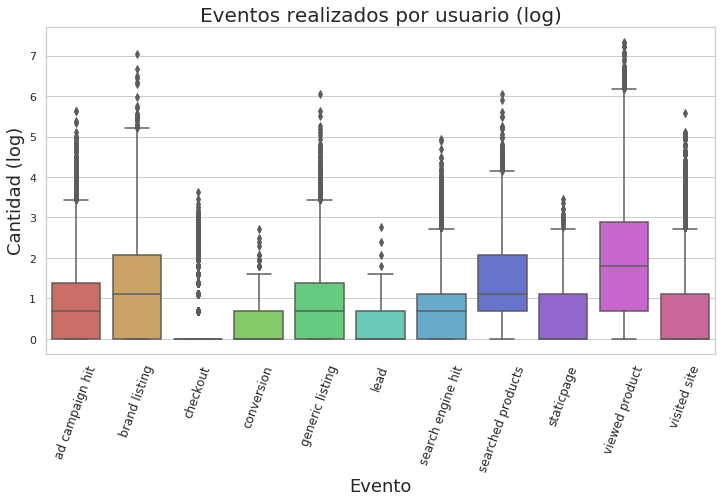

In [6]:
plt.figure(figsize = (12,6))
g = sns.boxplot(x="event", y="number_log", 
                     data=acciones_por_persona, palette="hls")
g.set_title("Eventos realizados por usuario (log)", fontsize=20)
g.set_xlabel("Evento", fontsize=18)
g.set_ylabel("Cantidad (log)", fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation = 70, fontsize = 12);
#este grafico no sirve, pensar alguno que pueda representar los datos
#hay muchos outlier y no sirve la escala log

## Nuevo vs usarios que ya visitaron la pagina

In [7]:
events['new_vs_returning'].isnull().value_counts()

True     923910
False     87378
Name: new_vs_returning, dtype: int64

In [8]:
events['new_vs_returning'].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [9]:
new_vs_returning = events.dropna(subset=['new_vs_returning'],how = 'all')
new_vs_returning['new_vs_returning'].isnull().value_counts()

False    87378
Name: new_vs_returning, dtype: int64

In [10]:
new_vs_returning = new_vs_returning.dropna(axis=1, how='all')
new_vs_returning.head()

,timestamp,event,person,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1,2018-05-31 23:38:05,visited site,0004b0a2,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
5,2018-05-29 13:29:26,visited site,0006a21a,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
9,2018-04-09 20:12:31,visited site,000a54b2,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0
16,2018-05-24 11:21:07,visited site,000a54b2,Paid,Returning,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 66.0
45,2018-04-06 05:12:05,visited site,00184bf9,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0


In [11]:
new_vs_returning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87378 entries, 1 to 1011284
Data columns (total 12 columns):
timestamp                   87378 non-null datetime64[ns]
event                       87378 non-null category
person                      87378 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                      87378 non-null object
country                     87378 non-null object
device_type                 87378 non-null object
screen_resolution           87378 non-null object
operating_system_version    87378 non-null object
browser_version             87378 non-null object
dtypes: category(1), datetime64[ns](1), object(10)
memory usage: 8.1+ MB


In [12]:
new_vs_returning.groupby('new_vs_returning')['event'].value_counts() #solo vistan el sitio? sirve de algo?

new_vs_returning  event       
New               visited site    26898
Returning         visited site    60480
Name: event, dtype: int64

In [61]:
unknown_vs_known = new_vs_returning[new_vs_returning['new_vs_returning'] == 'New']
unknown_vs_known = unknown_vs_known[['new_vs_returning','city']]
unknown_vs_known['Known'] = unknown_vs_known['city'] != 'Unknown'

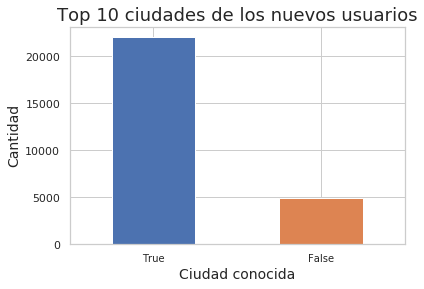

In [64]:
unknown_vs_known_plot = unknown_vs_known['Unknown'].value_counts().plot.bar()
unknown_vs_known_plot.set_title('Top 10 ciudades de los nuevos usuarios',fontsize = 18)
unknown_vs_known_plot.set_ylabel('Cantidad',fontsize = 14)
unknown_vs_known_plot.set_xlabel('Ciudad conocida',fontsize = 14)
unknown_vs_known_plot.set_xticklabels(unknown_vs_known_plot.get_xticklabels(), rotation = 0, fontsize = 10);
# plt.xticks(['False','True'], ['Known','Unknown'], rotation=30); 

In [13]:
new_users = new_vs_returning[new_vs_returning['new_vs_returning'] == 'New']
new_users.head() #Deberiamos borrar los unkown?

,timestamp,event,person,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1,2018-05-31 23:38:05,visited site,0004b0a2,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
5,2018-05-29 13:29:26,visited site,0006a21a,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
9,2018-04-09 20:12:31,visited site,000a54b2,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0
45,2018-04-06 05:12:05,visited site,00184bf9,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0
96,2018-05-17 00:08:56,visited site,0019c395,Paid,New,Unknown,Unknown,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 66.0


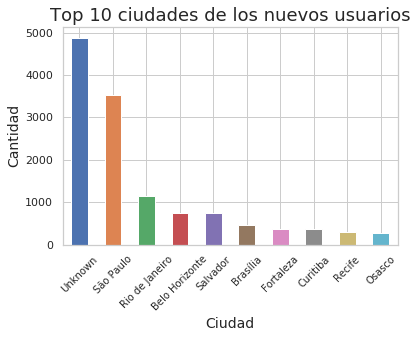

In [14]:
g = new_users['city'].value_counts().head(10).plot(kind = 'bar', color=sns.color_palette())
g.set_title('Top 10 ciudades de los nuevos usuarios',fontsize = 18)
g.set_ylabel('Cantidad',fontsize = 14)
g.set_xlabel('Ciudad',fontsize = 14)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10);

In [23]:
returning_users = new_vs_returning[new_vs_returning['new_vs_returning'] == 'Returning']
returning_users.head() #Deberiamos borrar los unkown?

,timestamp,event,person,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
16,2018-05-24 11:21:07,visited site,000a54b2,Paid,Returning,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 66.0
87,2018-05-04 18:47:03,visited site,00184bf9,Direct,Returning,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 66.0
108,2018-06-08 12:15:33,visited site,001bb7eb,Paid,Returning,Unknown,Unknown,Brazil,Computer,1366x768,Windows 7,Firefox 52
118,2018-01-31 16:54:29,visited site,00204059,Social,Returning,Unknown,Unknown,Unknown,Computer,1024x600,Windows 7,Chrome 63.0
127,2018-02-01 23:16:05,visited site,00204059,Referral,Returning,Unknown,Unknown,Unknown,Computer,1024x600,Windows 7,Chrome 63.0


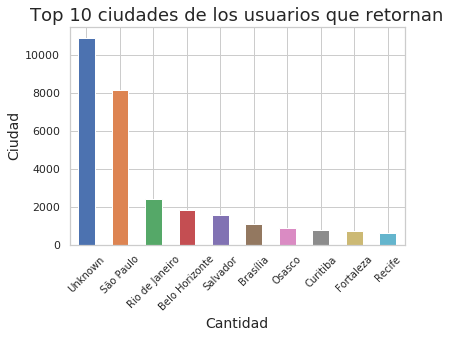

In [65]:
g = returning_users['city'].value_counts().head(10).plot(kind = 'bar', color=sns.color_palette())
g.set_title('Top 10 ciudades de los usuarios que retornan',fontsize = 18)
g.set_xlabel('Cantidad',fontsize = 14)
g.set_ylabel('Ciudad',fontsize = 14)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10);

Se puede ver que los nuevos usuarios y los que ya visitaron al menos una vez el sitio son en gran mayoria de las mismas ciudades 

In [68]:
# personas que volvieron vs personas que no
new = events[(events['new_vs_returning'] == 'New')][['person', 'timestamp']]
returning = events[(events['new_vs_returning'] == 'Returning')][['person', 'timestamp', 'channel']]
returning_users = pd.merge(new, returning, on='person', how='left')
returning_users = returning_users.groupby('person').agg({'count'})
returning_users.reset_index(inplace=True)
# cantidad que volvió vs que no volvió 
s =returning_users[('timestamp_y', 'count')].value_counts()
b = pd.Series([s[0:1].values.sum(), s[1:2].values.sum(),
               s[2:3].values.sum(), s[3:4].values.sum(),
               s[4:5].values.sum(), s[5:6].values.sum(),
               s[6:7].values.sum(), s[7:8].values.sum(),
               s[8:9].values.sum(), s[9:10].values.sum(),
               s[10:11].values.sum(), s[11:].values.sum()])
b.index = ["0","1","2","3","4","5","6","7","8","9","10","11+"]

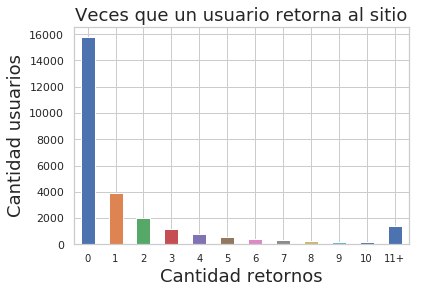

In [69]:
# se puede ver que la mayoría de los usuarios no vuelve al sitio
g = b.plot.bar()
g.set_title("Veces que un usuario retorna al sitio", fontsize=18)
g.set_xlabel("Cantidad retornos", fontsize=18)
g.set_ylabel("Cantidad usuarios", fontsize=18);
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10);

In [19]:
# me quedo con los que volvieron
returning = events[(events['new_vs_returning'] == 'Returning')][['person', 'timestamp', 'channel']]
channels_returned = returning.groupby('channel').agg({'person':'count'})
channels_returned.reset_index(inplace = True)
channels_returned.columns = ['channel', 'count']
channels_returned = channels_returned.sort_values(by = 'count', ascending = False)
channels_returned.count = pd.to_numeric(channels_returned['count'], errors = 'coerce')

Text(0,0.5,'Nombre de canal')

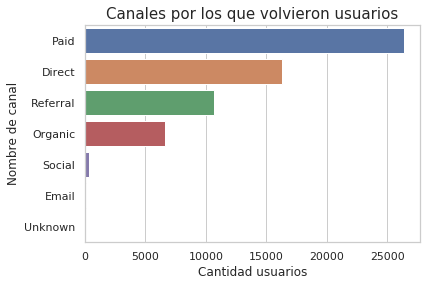

In [20]:
# canales por los cuales la gente vuelve
g = sns.barplot(x=channels_returned.count, y=channels_returned.channel)
g.set_title("Canales por los que volvieron usuarios", fontsize=15)
g.set_xlabel("Cantidad usuarios", fontsize=12)
g.set_ylabel("Nombre de canal", fontsize=12)

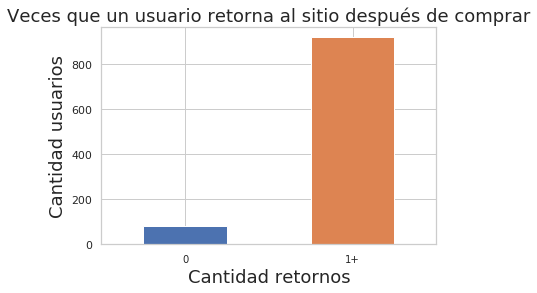

In [71]:
# si un usuario realiza una compra, ¿luego vuelve?
conversion_events = events[events['event'] == 'conversion'][['person', 'timestamp']]
returning = events[(events['new_vs_returning'] == 'Returning')][['person', 'timestamp']]
returning_users = pd.merge(conversion_events, returning, on='person', how='left')
returning_users = returning_users[returning_users['timestamp_x'] < returning_users['timestamp_y']]
returning_users = returning_users.groupby(['person', 'timestamp_x']).agg({'count'}).reset_index()

# cantidad que volvió vs que no volvió 
s =returning_users[('timestamp_y', 'count')].value_counts()
b = pd.Series([s[0:1].values.sum(), s[1:].values.sum()])
b.index = ["0","1+"]
g = b.plot.bar()
g.set_title("Veces que un usuario retorna al sitio después de comprar", fontsize=18)
g.set_xlabel("Cantidad retornos", fontsize=18)
g.set_ylabel("Cantidad usuarios", fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10);